In [60]:
import pandas as pd

import pandapower as pp
import pandapower.networks as pn
import pandapower.plotting as plot
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
matplotlib.rcParams['timezone'] = 'Europe/Berlin'

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [61]:
# create random time series from import data
da = data_process_base.DataAction()
keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'cet_cest_timestamp']
da.imp_procc("house_data.csv", keep_cols)
night_merge = da.power_merge()

Number of data frame segments =  90
dfList created successfully.


In [80]:
# # for testing the sgen_comm function
# test = night_merge.iloc[:9,:].copy()
# da.sgen_comm(ts=test, wind_length=2, sgen_val=999999, parties=4)

,load_1,sgen_1,load_2,sgen_2,load_3,sgen_3,load_4,sgen_4
date_time,,,,,,,,
2016-06-06 20:00:00+02:00,0.008789,0,0.006152,999999,0.005859,0,0.0,0
2016-06-06 20:01:00+02:00,0.002930,0,0.000000,999999,0.012012,0,0.0,0
2016-06-06 20:02:00+02:00,0.002930,0,0.005859,0,0.006152,0,0.0,999999
2016-06-06 20:03:00+02:00,0.009375,0,0.005859,0,0.006152,0,0.0,999999
2016-06-06 20:04:00+02:00,0.006445,0,0.006152,0,0.012012,999999,0.0,0
2016-06-06 20:05:00+02:00,0.006445,0,0.006152,0,0.005859,999999,0.0,0
2016-06-06 20:06:00+02:00,0.009375,999999,0.005859,0,0.005859,0,0.0,0
2016-06-06 20:07:00+02:00,0.002930,999999,0.005859,0,0.012012,0,0.0,0
2016-06-06 20:08:00+02:00,0.002930,0,0.006152,0,0.006152,0,0.0,0


In [63]:
# assign generator value at random times
sgen_val = 0.01 # typical val: 0.010 MW = 10kW
night_mw = da.sgen_comm(ts=night_merge, wind_length=60, sgen_val=0.010, parties=4)


100%|██████████| 601/601 [00:01<00:00, 348.46it/s]


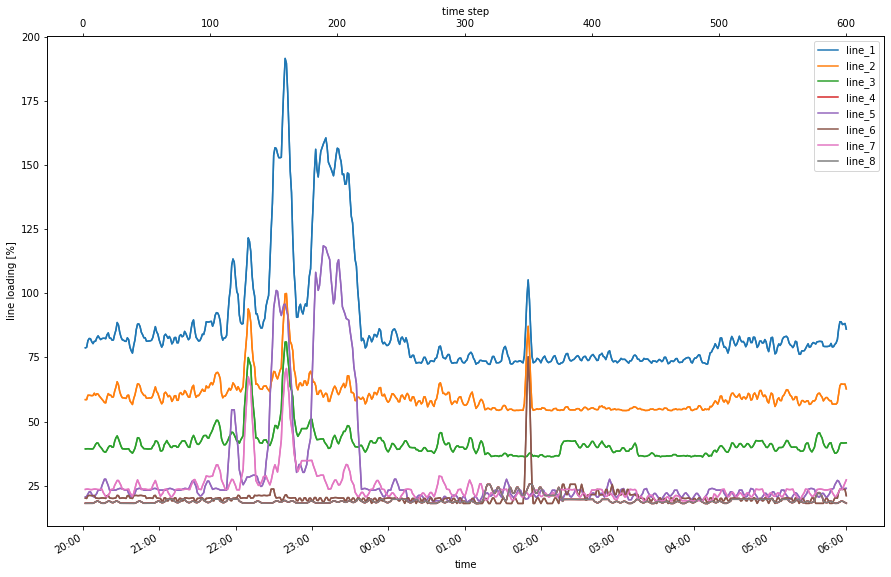

In [64]:
# run timeseries processes
nc = data_process_base.net_calc()

nc.four_loads_branched_make(night_mw)
nc.four_loads_branched_out("res_line", "loading_percent")
nc.four_loads_branched_run()
nc.four_loads_branched_read_loadpct()
nc.four_loads_branched_plot_linepct()